<a href="https://colab.research.google.com/github/silverstar0727/TIL/blob/main/DeepLearning/%EB%94%A5%EB%9F%AC%EB%8B%9D%ED%99%80%EB%A1%9C%EC%84%9C%EA%B8%B0/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

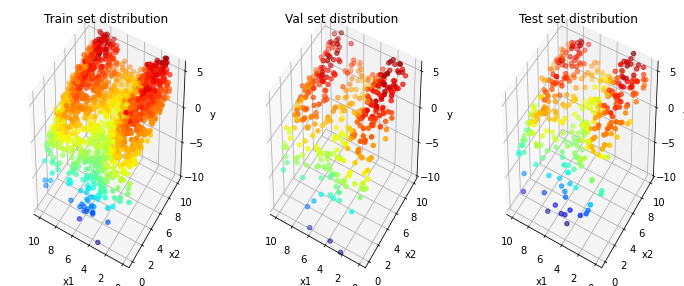

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

num_data = 2400 # 총 데이터 개수
x1 = np.random.rand(num_data)*10 # x1 데이터
x2 = np.random.rand(num_data)*10 # x2 데이터
e = np.random.normal(0, 0.5, num_data) # 오차항은 0~0.5까지의 normal dist에서 추출
X = np.array([x1, x2]).T # 2, 2400 전치하여 2400, 2으로 변환 (첫번째가 샘플의 개수여야..!)
y = 2*np.sin(x1) + np.log(0.5*x2**2) + e # y = 2*sin(x1) + log(0.5x2^2) + e

train_X, train_y = X[:1600, :], y[:1600]
val_X, val_y = X[1600:2000, :], y[1600:2000]
test_X, test_y = X[2000:2400, :], y[2000:2400]

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter(train_X[:, 0], train_X[:, 1], train_y, c = train_y, cmap='jet')

ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.set_title('Train set distribution')
ax1.set_zlim(-10, 6)
ax1.view_init(40, -60)
ax1.invert_xaxis()

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(val_X[:, 0], val_X[:, 1], val_y, c = val_y, cmap='jet')

ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')
ax2.set_title('Val set distribution')
ax2.set_zlim(-10, 6)
ax2.view_init(40, -60)
ax2.invert_xaxis()

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(test_X[:, 0], test_X[:, 1], test_y, c = test_y, cmap='jet')

ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('y')
ax3.set_title('Test set distribution')
ax3.set_zlim(-10, 6)
ax3.view_init(40, -60)
ax3.invert_xaxis()

In [37]:
import torch
import torch.nn as nn

class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_features=2, out_features=1, bias = False)

    def forward(self, x):
        return self.linear(x)

class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.linear1 = nn.Linear(in_features=2, out_features=200)
        self.linear2 = nn.Linear(in_features=200, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)

        return x

In [41]:
import torch.optim as optim
from sklearn.metrics import mean_absolute_error

reg_loss = nn.MSELoss()
model = MLPModel()

lr = 0.005
optimizer = optim.SGD(model.parameters(), lr = lr)

list_epoch = []
list_train_loss = []
list_val_loss = []
list_mae = []
list_mae_epoch = []

epoch = 4000
for i in range(epoch):
    # train
    model.train()
    optimizer.zero_grad()
    input_x = torch.Tensor(train_X)
    true_y = torch.Tensor(train_y)
    pred_y = model(input_x)

    loss = reg_loss(pred_y.squeeze(), true_y) # (1600, 1)을 squeeze하여 (1600)으로 바꿔줌
    loss.backward()
    optimizer.step()
    list_epoch.append(i)
    list_train_loss.append(loss.detach().numpy()) # detach는 gradient를 제거하기 위함. item()으로 써도 됨.

    # evaluation
    model.eval()
    optimizer.zero_grad()
    input_x = torch.Tensor(val_X)
    true_y = torch.Tensor(val_y)
    pred_y = model(input_x)

    loss = reg_loss(pred_y.squeeze(), true_y)
    list_val_loss.append(loss.detach().numpy())

    if i % 200 == 0:
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(test_X)
        true_y = torch.Tensor(test_y)
        pred_y = model(input_x).detach().numpy()

        mae = mean_absolute_error(true_y, pred_y)
        list_mae.append(mae)
        list_mae_epoch.append(i)

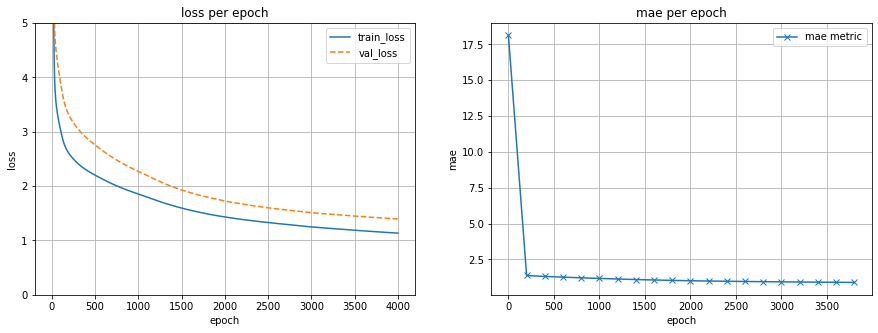

In [42]:
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label = 'train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label = 'val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0, 5)
ax1.legend()
ax1.grid()
ax1.set_title('loss per epoch')

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_mae_epoch, list_mae, marker='x', label='mae metric')

ax2.set_xlabel('epoch')
ax2.set_ylabel('mae')
ax2.grid()
ax2.legend()
ax2.set_title('mae per epoch')

plt.show()